In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
import numpy as np
import os, sys
from datetime import *
from dateutil import parser
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

%matplotlib inline
from IPython.display import clear_output

print("Current environment directory:" + sys.prefix)
print("System version: "+sys.version)

fs = 14
plt.rc('font',family='Times New Roman')
fn = 'Times New Roman'

Current environment directory:/home/emunsing/Research/StorageLocation/env
System version: 2.7.12 (default, Nov 19 2016, 06:48:10) 
[GCC 5.4.0 20160609]


### Overview of plots

**Maps:** Create output CSV file, and load into webpage as described below. Print/save webpage as PDF



- Profits with varying reservoir sizes - implementing CyLP
- Optimal Storage Size with varying battery cost - this
- Annual short-run trading profits per kWh - this file
- Annual cycle count with varying efficiency - this file
- Profit per cycle with varying efficiency - this file
- Distribution of nodal short-run trading profits - this file

## Charge/Discharge Validation Plots
These data run off data created by 'Implementing CyLP'

In [2]:
# Load price data - this will be one row of data with headers
priceDf = pd.read_csv('Data/inputData/BARRY_6_N001_only_2013.csv',index_col=0,parse_dates=True)
priceDf.columns = pd.DatetimeIndex(priceDf.columns) # convert to an indexable time
startDate = parser.parse('08/01/13 00:00')
endDate = parser.parse('08/03/13 06:00')

## Validation: Varying Efficiency

In [3]:
# These data run off data created by 'Implementing CyLP'.Expecting a file with raw data, no headers or index names
chargeDf = pd.read_csv('Data/chargeStates_efficiency.csv', header=None) # this is currently just for the range 08-01-13 00:00 to 08/03/13 06:00
chargeDf.columns = pd.date_range(startDate, endDate, freq='H')
chargeDf.index = [0.6,0.8,0.9]
mergeDf = pd.concat([priceDf,chargeDf],axis=0)
mergeDf = mergeDf.loc[:,startDate:endDate]
mergeDf = mergeDf.transpose()

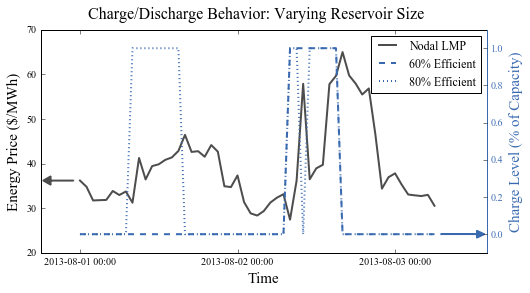

In [4]:
plotDf = mergeDf
fig, ax1 = plt.subplots(figsize=(8,4))
energyPriceColor = (0.3,0.3,0.3)
myChargeColor = (57/256.0, 106/256.0, 177/256.0)

hdl1 = ax1.plot(plotDf.index,plotDf['BARRY_6_N001'], color=energyPriceColor, linewidth=2, label='Nodal LMP')    
# Charge behavior- second axis
ax2 = ax1.twinx()
hdl2 = ax2.plot(plotDf.index, plotDf[0.6], '--', color=myChargeColor, linewidth=2, label='60% Efficient')
hdl3 = ax2.plot(plotDf.index, plotDf[0.8], ':', color=myChargeColor,  linewidth=2, label='80% Efficient')

# Titles
plt.suptitle('Charge/Discharge Behavior: Varying Reservoir Size', fontsize=fs+2)
ax1.set_ylabel('Energy Price ($/MWh)', fontsize=fs+1) #, color='k')
ax2.set_ylabel('Charge Level (% of Capacity)', fontsize=fs+1, color=myChargeColor)

# Datetime ticks
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
myLocator = DayLocator()
ax1.xaxis.set_major_locator(myLocator)
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))

# Labels and limits
ax1.set_xlabel('Time', fontsize=fs+1)
plotStartDate = parser.parse('07/31/13 18:00')
plotEndDate = parser.parse('08/03/13 14:00')
ax1.set_xlim([plotStartDate, plotEndDate])
ax1.set_ylim([20,70])
ax2.set_ylim([-0.1,1.1])

# # Plot arrows
oneHour = timedelta(hours=1)
# Arrow for energy price
startPltDate = pltdates.date2num(startDate-oneHour)
headLength = 0.05
ax1.arrow(startPltDate, plotDf.loc[startDate,'BARRY_6_N001'], 
          pltdates.date2num(plotStartDate) - startPltDate + headLength*1.3, 0,
          head_width=2, head_length=headLength, fc=energyPriceColor, ec=energyPriceColor, linewidth=1.5)
# Arrow for charge status
startPltDate = pltdates.date2num(endDate+oneHour)
headLength = 0.05
ax2.arrow(startPltDate, plotDf.loc[endDate,0.6], 
          pltdates.date2num(plotEndDate) - startPltDate - headLength*1.3, 0,
          head_width=0.04, head_length=headLength, fc=myChargeColor, ec=myChargeColor, linewidth=1.5)



# Legend
handles = hdl1+hdl2+hdl3
labels = [l.get_label() for l in handles]
plt.legend(handles, labels,loc='upper right')

# Set colors for the axis ticks
ax1.spines['right'].set_color(myChargeColor)
ax2.spines['right'].set_color(myChargeColor)
for tl in ax2.get_yticklabels():
    tl.set_color(myChargeColor)

plt.savefig('Plots/chargeValidation_varyingEfficiency.pdf',bbox_inches='tight')

## Validation: Varying reservoir size

In [5]:
# These data run off data created by 'Implementing CyLP'.Expecting a file with raw data, no headers or index names
chargeDf = pd.read_csv('Data/chargeStates_varySize.csv', header=None).transpose() # this is currently just for the range 08-01-13 00:00 to 08/03/13 06:00
chargeDf.columns = pd.date_range(startDate, endDate, freq='H')
chargeDf.index = [1,2,6] # Check the block under 'Validation: plotting charge status for different reservoir sizes' in Implementation...ipynb to get the corresponding set
mergeDf = pd.concat([priceDf,chargeDf],axis=0)
mergeDf = mergeDf.loc[:,startDate:endDate]
mergeDf = mergeDf.transpose()

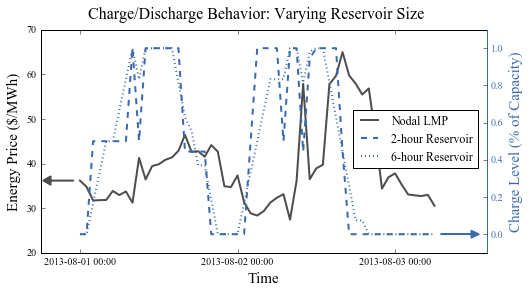

In [6]:
plotDf = mergeDf
fig, ax1 = plt.subplots(figsize=(8,4))
myChargeColor = (57/256.0, 106/256.0, 177/256.0)

hdl1 = ax1.plot(plotDf.index,plotDf['BARRY_6_N001'], color=(0.3,0.3,0.3), linewidth=2, label='Nodal LMP')    
# Charge behavior- second axis
ax2 = ax1.twinx()
hdl2 = ax2.plot(plotDf.index, plotDf[2], '--', color=myChargeColor, linewidth=2, label='2-hour Reservoir')
hdl3 = ax2.plot(plotDf.index, plotDf[6], ':', color=myChargeColor,  linewidth=2, label='6-hour Reservoir')

# Titles
plt.suptitle('Charge/Discharge Behavior: Varying Reservoir Size', fontsize=fs+2)
ax1.set_ylabel('Energy Price ($/MWh)', fontsize=fs+1) #, color='k')
ax2.set_ylabel('Charge Level (% of Capacity)', fontsize=fs+1, color=myChargeColor)

# Datetime ticks
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
myLocator = DayLocator()
ax1.xaxis.set_major_locator(myLocator)
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))

# Labels and limits
plotStartDate = parser.parse('07/31/13 18:00')
plotEndDate = parser.parse('08/03/13 14:00')
ax1.set_xlim([plotStartDate, plotEndDate])
startPltDate = pltdates.date2num(startDate-oneHour)

ax1.set_xlabel('Time', fontsize=fs+1)
# ax1.set_xlim(['07/31/13 18:00','08/03/13 13:00'])
ax1.set_ylim([20,70])
ax2.set_ylim([-0.1,1.1])

# # Plot arrows
oneHour = timedelta(hours=1)
# Arrow for energy price
startPltDate = pltdates.date2num(startDate-oneHour)
headLength = 0.05
ax1.arrow(startPltDate, plotDf.loc[startDate,'BARRY_6_N001'], 
          pltdates.date2num(plotStartDate) - startPltDate + headLength*1.3, 0,
          head_width=2, head_length=headLength, fc=energyPriceColor, ec=energyPriceColor, linewidth=1.5)
# Arrow for charge status
startPltDate = pltdates.date2num(endDate+oneHour)
headLength = 0.05
ax2.arrow(startPltDate, plotDf.loc[endDate,2], 
          pltdates.date2num(plotEndDate) - startPltDate - headLength*2, 0,
          head_width=0.04, head_length=headLength, fc=myChargeColor, ec=myChargeColor, linewidth=1.5)
# Legend
handles = hdl1+hdl2+hdl3
labels = [l.get_label() for l in handles]
plt.legend(handles, labels,loc=(0.7,0.38))

# Set colors for the axis ticks
ax1.spines['right'].set_color(myChargeColor)
ax2.spines['right'].set_color(myChargeColor)
for tl in ax2.get_yticklabels():
    tl.set_color(myChargeColor)

plt.savefig('Plots/chargeValidation_varyingSize.pdf',bbox_inches='tight')

## Optimal Reservoir Size, varying storage price

In [108]:
# Nodes in rows, scenarios in columns
sizeDf = pd.read_csv('Data/VaryingPrices_StorageSizing_v2.csv',header=0,index_col=0)
profitDf = pd.read_csv('Data/VaryingPrices_StorageProfits_v2.csv',header=0,index_col=0)
cycleDf = pd.read_csv('Data/VaryingPrices_StorageCycles_v2.csv',header=0,index_col=0)
print("%s nodes and %s scenarios"%(sizeDf.shape[0], sizeDf.shape[1]))

2247 nodes and 190 scenarios


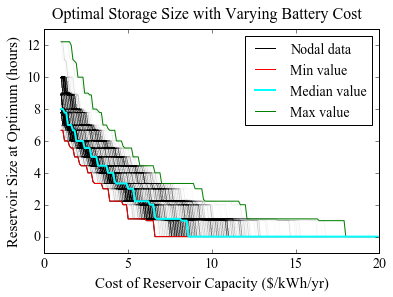

In [109]:
myDf = sizeDf # assume that columns are different simulations and rows are observations
x = myDf.columns.astype(float)
# fs = 12

# Need to save the handles for the items that we want in the legend
# Because plotted main data with tiny opacity, will need to re-plot with black and save data
ax = plt.subplot()
plt.plot(x,myDf.transpose(),alpha=0.01, color='black')  # Plots all the data with low opacity
dataHdl, = plt.plot(x,myDf.min(), color='black') # This will be covered up; we just use this for the legend
minHdl, = plt.plot(x,myDf.min(), color='red')
maxHdl, = plt.plot(x,myDf.max(), color='green')
medHdl, = plt.plot(x,myDf.median(), color='cyan',linewidth=2)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fs)

ax.set_ylim([-1,13])
plt.xlabel('Cost of Reservoir Capacity ($/kWh/yr)',fontsize=fs+1)
plt.ylabel('Reservoir Size at Optimum (hours)',fontsize=fs+1)
plt.suptitle('Optimal Storage Size with Varying Battery Cost',fontsize=fs+2)
plt.legend([dataHdl,minHdl,medHdl, maxHdl],['Nodal data','Min value','Median value','Max value'],loc='upper right',fontsize=fs)
# plt.savefig('Plots/VaryingPrices_storageCapacity.eps', format='eps',bbox_inches='tight')
plt.savefig('Plots/VaryingPrices_storageCapacity.pdf',bbox_inches='tight')
#plt.savefig('kwhValue.png', dpi=300, bbox_inches='tight')

## Plot Profits with Varying Reservoir Sizes

In [4]:
resultDf.head()

,Unnamed: 0,storageSize,storageProfit,cycleCount,eState
0,0.0,0.0,3.337501e-13,-5.217758e-11,[ -1.00000000e-12 -1.00000000e-12 -1.0000000...
1,0.1,0.1,6.973911e-04,2.000000e-01,[ 0.00000000e+00 1.00000000e-12 2.0000000...
2,0.2,0.2,1.394782e-03,4.000000e-01,[ 0. 0. 0. 0. 0.2 0.2 0.2 0.2 0.2 ...
3,0.3,0.3,2.092173e-03,6.000000e-01,[ 0. 0. 0. 0. 0.3 0.3 0.3 0.3 0.3 ...
4,0.4,0.4,2.789564e-03,8.000000e-01,[ 0. 0. 0. 0. 0.4 0.4 0.4 0.4 0.4 ...


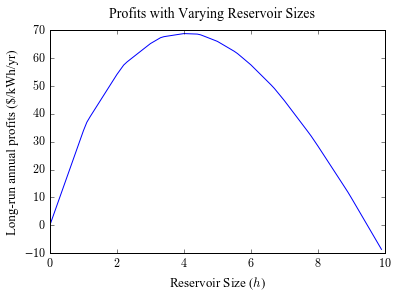

In [12]:
resultDf = pd.read_csv('Data/SweepStorageSize_ForPlotting.csv')
## Plot Results ## 
fs = 12

plt.rc('text',usetex='true')

plt.plot(resultDf['storageSize'],resultDf['storageProfit'])
plt.xlabel('Reservoir Size ($h$)', fontsize=fs+1)
plt.ylabel('Long-run annual profits ($/kWh/yr)', fontsize=fs+1)
plt.suptitle('Profits with Varying Reservoir Sizes', fontsize= fs+2)

plt.rc('text',usetex='false')
plt.savefig('Plots/Profit_VaryingSize.pdf',bbox_inches='tight')

ax = plt.subplot()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontname('Arial')
    label.set_fontsize(fs)

## Plot Function used for the 3 Efficiency Plots

In [2]:
def plotEfficiencyGraph(myDf, eff):
    minVal = myDf.min()
    maxVal = myDf.max()
    #meanVal = myDf.mean()
    medVal = myDf.median()

    # Need to save the handles for the items that we want in the legend
    # Because plotted main data with tiny opacity, will need to re-plot with black and save data
    ax = plt.subplot()
    plt.plot(eff,myDf.transpose(),alpha=0.01, color='black')
    dataHdl, = plt.plot(eff,minVal, color='black', label='Nodal data') # This will be covered up; we just use this for the legend
    minHdl, = plt.plot(eff,minVal, color='red', label='Min value')
    maxHdl, = plt.plot(eff,maxVal, color='green', label='Max value')
    medHdl, = plt.plot(eff,medVal, color='cyan',linewidth=2, label='Median value')

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        #label.set_fontname('Arial')
        label.set_fontsize(fs)
        
    plt.legend([dataHdl,minHdl,medHdl, maxHdl],['Nodal data','Min value','Median value','Max value'],fontsize=fs+1)

    return (ax, plt)



### Annual Short-run trading profits per kWh

In [16]:
profitFileName = 'Data/kwhValueAggregated_step_02.csv' 

kwhValue = pd.read_csv(profitFileName, header=None)
if np.isnan(kwhValue.iloc[0,0]):
    kwhValue = pd.read_csv(profitFileName,header=0,index_col=0)


In [17]:
kwhValue.head()

,0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,...,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98,1.0
ACTONSC_6_N001,0.338931,0.448406,0.569991,0.582813,0.597491,0.645190,0.811347,0.830638,0.901163,1.461166,...,31.439591,37.540980,42.170592,46.879041,49.437441,54.091352,57.633654,61.632900,65.873148,71.110632
ADCC_2_N001,3.175630,3.738461,4.404686,5.189198,6.135430,7.221153,8.441563,9.805214,11.326596,12.973464,...,37.572672,39.755294,41.973799,44.250495,46.586581,48.997996,51.525790,54.257878,57.335680,61.120148
AEC300_1_N001,-68.473376,-62.273790,-58.359713,-52.357275,-48.197387,-45.177324,-39.197040,-38.023775,-33.859672,-29.842558,...,25.103586,29.539501,33.961420,38.684697,43.339548,48.143185,52.844491,57.585241,62.299244,67.023178
AGNEW_1_N003,3.664352,4.288280,5.025925,5.903198,6.941697,8.129562,9.464989,10.958248,12.611813,14.395866,...,40.222011,42.504267,44.824146,47.207116,49.662420,52.196714,54.855999,57.716802,60.934538,64.867179
AIRPROD_1_N001,-6.070813,-4.177861,-2.178774,-0.130137,1.837130,3.823807,5.853318,8.253743,10.655128,13.040516,...,43.607679,46.417984,49.321190,52.279322,55.640488,59.219660,63.036456,67.091033,71.655236,77.206176


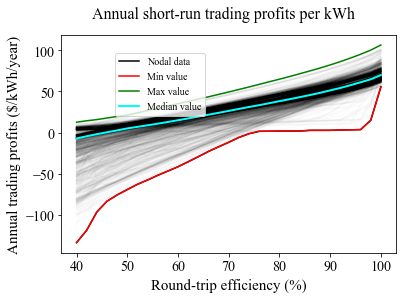

In [18]:
profitFileName = 'Data/kwhValueAggregated_step_02.csv' 

kwhValue = pd.read_csv(profitFileName, header=None)
if np.isnan(kwhValue.iloc[0,0]):
    kwhValue = pd.read_csv(profitFileName,header=0,index_col=0)
    
eff = range(40, 102, 2)

ax,plt = plotEfficiencyGraph(kwhValue, eff)

#meanHdl, = plt.plot(eff,meanVal, color = 'cyan')
plt.xlabel('Round-trip efficiency (%)',fontsize=fs+1)
plt.ylabel('Annual trading profits ($/kWh/year)',fontsize=fs+1)
plt.suptitle('Annual short-run trading profits per kWh',fontsize=fs+2)
plt.legend(loc=(.16,.63))
plt.savefig('Plots/varyefficiency_kwhValue.pdf',bbox_inches='tight')
#plt.savefig('kwhValue.png', dpi=300, bbox_inches='tight')

In [4]:
kwhValue.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,NaN,0.400000,0.420000,0.440000,0.460000,0.480000,0.500000,0.520000,0.540000,0.560000,...,0.820000,0.840000,0.860000,0.880000,0.900000,0.920000,0.940000,0.960000,0.980000,1.000000
1,ACTONSC_6_N001,0.338931,0.448406,0.569991,0.582813,0.597491,0.645190,0.811347,0.830638,0.901163,...,31.439591,37.540980,42.170592,46.879041,49.437441,54.091352,57.633654,61.632900,65.873148,71.110632
2,ADCC_2_N001,3.175630,3.738461,4.404686,5.189198,6.135430,7.221153,8.441563,9.805214,11.326596,...,37.572672,39.755294,41.973799,44.250495,46.586581,48.997996,51.525790,54.257878,57.335680,61.120148
3,AEC300_1_N001,-68.473376,-62.273790,-58.359713,-52.357275,-48.197387,-45.177324,-39.197040,-38.023775,-33.859672,...,25.103586,29.539501,33.961420,38.684697,43.339548,48.143185,52.844491,57.585241,62.299244,67.023178
4,AGNEW_1_N003,3.664352,4.288280,5.025925,5.903198,6.941697,8.129562,9.464989,10.958248,12.611813,...,40.222011,42.504267,44.824146,47.207116,49.662420,52.196714,54.855999,57.716802,60.934538,64.867179


## Cycle count

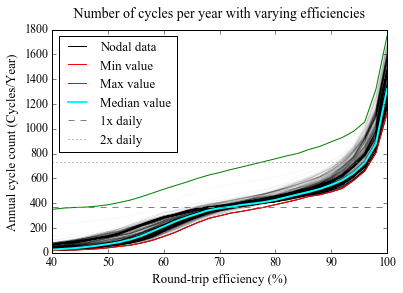

In [113]:
cycleCount = pd.read_csv('Data/cycleCount_step_02.csv', header=None)

ax,plt = plotEfficiencyGraph(cycleCount, eff)

d365, = plt.plot(eff,365*np.ones((31,1)),color="gray", linestyle='--')
d730, = plt.plot(eff,730*np.ones((31,1)),color="gray", linestyle=':')

plt.xlabel('Round-trip efficiency (%)',fontsize=fs+1)
plt.ylabel('Annual cycle count (Cycles/Year)',fontsize=fs+1)
plt.suptitle('   Number of cycles per year with varying efficiencies',fontsize=fs+2)

handles, labels = ax.get_legend_handles_labels()
handles.extend([d365, d730])
labels.extend(['1x daily','2x daily'])
legend = plt.legend(handles,labels,loc='upper left',fontsize=fs+1)

plt.savefig('Plots/varyefficiency_cycleCount.pdf',bbox_inches='tight')
#plt.savefig('cycleCount.pdf', bbox_inches='tight')

## Profit Per Cycle

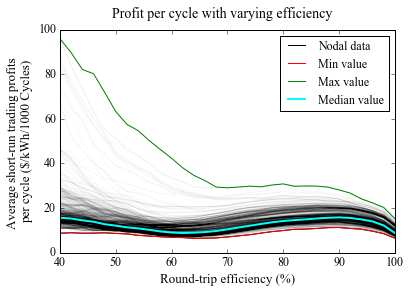

In [122]:
cycleValue = pd.read_csv('Data/cycleValue_step_02.csv', header=None)

ax,plt = plotEfficiencyGraph(cycleValue, eff)

plt.xlabel('Round-trip efficiency (%)',fontsize=fs+1)
plt.ylabel('Average short-run trading profits \nper cycle ($/kWh/1000 Cycles)',fontsize=fs+1)
plt.suptitle('Profit per cycle with varying efficiency',fontsize=fs+2)
plt.legend(loc='upper right')

plt.savefig('Plots/varyefficiency_cycleProfit.pdf', bbox_inches='tight')

## Distribution of profits / normality test

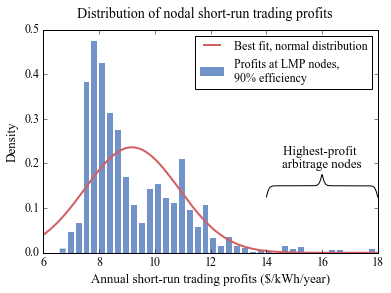

In [117]:
kwhValue = pd.read_csv('Data/kwhValue_step_02.csv', header=None)
n, bins, patches = plt.hist(kwhValue.iloc[:,25],40,normed=1,histtype='bar',rwidth=0.75, label= 'Profits at LMP nodes, \n90% efficiency', linewidth=0, facecolor= (114/256.,147/256.,203/256.),)

import pylab as P

x = np.linspace(6,18,200)

# y = P.normpdf(x,9.18083, 1.68882)
y = plt.mlab.normpdf(x,9.18083, 1.68882)


ax = plt.subplot()
normHdl, = plt.plot(x, y, linewidth=2, color=(211/256.,94/256.,96/256.),label='Best fit, normal distribution')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontname('Arial')
    label.set_fontsize(fs)

## Following code chunk was taken from http://stackoverflow.com/questions/1289681/drawing-braces-with-pyx    
def half_brace(x, beta):
    x0, x1 = x[0], x[-1]
    y = 1/(1.+np.exp(-1*beta*(x-x0))) + 1/(1.+np.exp(-1*beta*(x-x1)))
    return y

xmax, xstep = 4, .01
xaxis = np.arange(0, xmax/2, xstep)
y0 = half_brace(xaxis, 20.)
y = np.concatenate((y0, y0[::-1]))

plt.plot(np.arange(0,xmax,xstep)+14,y*.05+0.1,'black')
plt.figtext(.77,0.42,'Highest-profit \narbitrage nodes',fontsize = fs+1,horizontalalignment='center')
## end of code chunk

plt.xlabel('Annual short-run trading profits ($/kWh/year)',fontsize=fs+1)
plt.ylabel('Density',fontsize=fs+1)
plt.suptitle('Distribution of nodal short-run trading profits',fontsize=fs+2)
plt.legend(loc='upper right',fontsize=fs)
plt.savefig('Plots/ProfitDistribution.eps', type='eps', bbox_inches='tight')

#plt.setp(patches,'facecolor','g','alpha',0.2)
plt.savefig('Plots/ProfitDistribution.pdf', bbox_inches='tight')

## Impact of Price-Taker Assumption on Profits

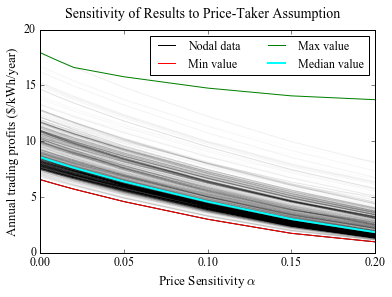

In [119]:
# sizeDf = pd.read_csv('Data/VaryingAlpha_StorageSizing_v2.csv')
profitDf = pd.read_csv('Data/VaryingAlpha_StorageProfits_v2.csv', header=0, index_col=0)
# cycleDf = pd.read_csv('Data/VaryingAlpha_StorageCycles_v2.csv')

myDf = profitDf
alphaSet = myDf.columns.values.astype('float64')

ax,plt = plotEfficiencyGraph(myDf, alphaSet)

ax.set_xlim([alphaSet[0],alphaSet[-1]])
ax.set_ylim([0,20])

plt.legend(loc="upper right", ncol=2)  # Legend location, either: "upper right", "best", or tuple for positioning of the bottom-left corner in (x,y)

#meanHdl, = plt.plot(eff,meanVal, color = 'cyan')
plt.xlabel(r'Price Sensitivity $\alpha$',fontsize=fs+1)
plt.ylabel('Annual trading profits ($/kWh/year)',fontsize=fs+1)
plt.suptitle('Sensitivity of Results to Price-Taker Assumption',fontsize=fs+2)
plt.savefig('Plots/Profits_VaryingAlpha.pdf',bbox_inches='tight')
# #plt.savefig('kwhValue.png', dpi=300, bbox_inches='tight')

In [103]:
profitDf.describe().loc[['min','50%','max'],:]

,0,0.01,0.02,0.05,0.1,0.15,0.2
min,6.556163,6.122843,5.709802,4.588903,3.006454,1.745005,0.982295
50%,8.566180,8.084223,7.619404,6.384045,4.586939,3.025071,1.851830
max,17.929711,17.253046,16.611693,15.774211,14.759322,14.063155,13.719857


# Map Plotting - USE /research/Mapping/electricitymapper/electricitymapper_print

- run `python -m SimpleHTTPServer` and load main.html
- upload CSV
- Reposition maps to have all of the CA nodes
- Save a PDF from Chrome
- Open the PDF in Inkscape; resize document to fit map
- Save as PDF

In [51]:
from dateutil import parser, relativedelta

# import price data as a dataframe: columns are times, rows are nodes.  Size is nodes x 8760
APNode_Prices = pd.read_csv("/Users/emunsing/GoogleDrive/CE 290 Project/Data Collection/Prices/R code/All_PNodes_MCC_Aggregated_2013short.csv",
                      header=0,index_col=0)#,nrows=10)
APNode_Prices.columns = pd.DatetimeIndex(APNode_Prices.columns)
timestep = relativedelta.relativedelta(APNode_Prices.columns[2],APNode_Prices.columns[1])
delta_T = timestep.hours  # Time-step in hours

APNode_Prices.head()

,2013-01-01 00:00:00,2013-01-01 01:00:00,2013-01-01 02:00:00,2013-01-01 03:00:00,2013-01-01 04:00:00,2013-01-01 05:00:00,2013-01-01 06:00:00,2013-01-01 07:00:00,2013-01-01 08:00:00,2013-01-01 09:00:00,...,2013-12-31 14:00:00,2013-12-31 15:00:00,2013-12-31 16:00:00,2013-12-31 17:00:00,2013-12-31 18:00:00,2013-12-31 19:00:00,2013-12-31 20:00:00,2013-12-31 21:00:00,2013-12-31 22:00:00,2013-12-31 23:00:00
ACTONSC_6_N001,1.38800,0.47750,1.75795,4.28900,6.23032,4.56404,2.68193,2.71620,2.03397,7.15527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADCC_2_N001,-1.08863,-0.37215,-1.35108,-3.30215,-4.78832,-3.52198,-2.03148,-1.95548,-1.51308,-5.18140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AEC300_1_N001,-1.08863,-0.37215,-1.35108,-3.30215,-4.78832,-3.52198,-2.03148,-1.95548,-1.51308,-5.18140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGNEW_1_N003,-1.08863,-0.37215,-1.35108,-3.30215,-4.78832,-3.52198,-2.03148,-1.95548,-1.51308,-5.18140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIRPROD_1_N001,-1.08863,-0.37215,-1.35108,-3.30215,-4.78832,-3.52198,-2.03148,-1.95548,-1.51308,-5.18140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
avg_mcc = APNode_Prices.mean(axis=1)
avg_mcc.name = 'mcc'


In [74]:
nodes = pd.read_csv('Data/LMP_PointMap_Nodes.csv',index_col=0)
nodes.head()
export = nodes.join(avg_mcc,how='inner')
export.index.name = 'name'
export['mcc'].to_csv('Data/avg_mcc.csv')


In [72]:
export.head()

,latitude,longitude,type,mcc
name,,,,
ACTONSC_6_N001,45.6358,-121.94,Load Node,1.064087
ADCC_2_N001,37.6100,-121.81,Generation Node,-1.755519
AEC300_1_N001,37.7400,-121.48,Load Node,-1.767107
AGNEW_1_N003,37.5100,-121.84,Load Node,-1.622225
AIRPROD_1_N001,36.6500,-119.54,Load Node,0.212036
